# Imports

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from biokit.viz import corrplot


# Read data

In [ ]:
data_raw = pd.read_csv('FunFairExam24/bar_pass_prediction.csv')
data_raw.shape

(22407, 39)

In [ ]:
data_raw.describe()

,decile1b,decile3,ID,decile1,sex,race,cluster,lsat,ugpa,zfygpa,...,male,other,asian,black,hisp,pass_bar,tier,index6040,dnn_bar_pass_prediction,gpa
count,20803.000000,20803.000000,22407.000000,21315.000000,22402.000000,22391.000000,22311.000000,22407.000000,22407.000000,21423.000000,...,22402.000000,22407.000000,22407.000000,22407.000000,22407.000000,22407.000000,22311.000000,22407.000000,22407.000000,22407.000000
mean,5.528481,5.525934,13768.253537,5.708234,1.561378,6.458354,2.817355,36.767907,3.215451,0.086068,...,0.561378,0.018209,0.040032,0.059937,0.004686,0.947829,3.768814,744.196203,0.980682,3.215451
std,2.854800,2.851286,7929.063192,2.783098,0.496229,1.433301,1.384079,5.463248,0.404073,0.928683,...,0.496229,0.133708,0.196039,0.237375,0.068296,0.222377,1.179375,103.770570,0.022594,0.404073
min,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.500000,-3.350000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,288.947365,0.330740,1.500000
25%,3.000000,3.000000,6926.500000,3.000000,1.000000,7.000000,1.000000,33.000000,3.000000,-0.560000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,678.947352,0.971071,3.000000
50%,6.000000,6.000000,13772.000000,6.000000,2.000000,7.000000,3.000000,37.000000,3.200000,0.080000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,747.894717,0.983144,3.200000
75%,8.000000,8.000000,20628.500000,8.000000,2.000000,7.000000,4.000000,41.000000,3.500000,0.740000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,815.263136,0.996526,3.500000
max,10.000000,10.000000,27477.000000,10.000000,2.000000,8.000000,6.000000,48.000000,3.900000,3.250000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,989.999974,0.999698,3.900000


In [ ]:
data_raw.head(5)

,decile1b,decile3,ID,decile1,sex,race,cluster,lsat,ugpa,zfygpa,...,hisp,pass_bar,bar,bar_passed,tier,index6040,indxgrp,indxgrp2,dnn_bar_pass_prediction,gpa
0,10.0,10.0,2,10.0,1.0,7.0,1.0,44.0,3.5,1.33,...,0,1,a Passed 1st time,True,4.0,886.842082,g 700+,i 820+,0.979804,3.5
1,5.0,4.0,3,5.0,1.0,7.0,2.0,29.0,3.5,-0.11,...,0,1,a Passed 1st time,True,2.0,649.999987,f 640-700,f 640-700,0.979804,3.5
2,3.0,2.0,36,3.0,2.0,7.0,3.0,36.0,3.5,-0.64,...,0,1,a Passed 1st time,True,3.0,760.526298,g 700+,h 760-820,0.979804,3.5
3,7.0,4.0,52,7.0,2.0,7.0,3.0,39.0,3.5,0.34,...,0,1,a Passed 1st time,True,3.0,807.894717,g 700+,h 760-820,0.979804,3.5
4,9.0,8.0,55,9.0,2.0,7.0,4.0,48.0,3.5,1.02,...,0,1,a Passed 1st time,True,5.0,949.999974,g 700+,i 820+,0.979804,3.5


In [ ]:
data_raw.columns

Index(['decile1b', 'decile3', 'ID', 'decile1', 'sex', 'race', 'cluster',
       'lsat', 'ugpa', 'zfygpa', 'DOB_yr', 'grad', 'zgpa', 'bar1', 'bar1_yr',
       'bar2', 'bar2_yr', 'fulltime', 'fam_inc', 'age', 'gender', 'parttime',
       'male', 'race1', 'race2', 'Dropout', 'other', 'asian', 'black', 'hisp',
       'pass_bar', 'bar', 'bar_passed', 'tier', 'index6040', 'indxgrp',
       'indxgrp2', 'dnn_bar_pass_prediction', 'gpa'],
      dtype='object')

# Data Cleaning

In [ ]:
columns_to_keep = ['bar1', 'lsat', 'DOB_yr', 'fulltime', 'fam_inc','male', 'race1', "decile3", "decile1"]
columns_to_keep.sort()
columns_to_keep

['DOB_yr',
 'bar1',
 'decile1',
 'decile3',
 'fam_inc',
 'fulltime',
 'lsat',
 'male',
 'race1']

In [ ]:
#columns chosen with help from: https://www.kaggle.com/datasets/danofer/law-school-admissions-bar-passage/discussion/350765
#target is pass_bar, which is if the bar was passed for exam or reexam the year after (not just first year trying)
data = data_raw[columns_to_keep]
data.isna().sum() # we have a few NA values so for convinience I have dropped them
data = data.dropna()

#Calculate the average ranking of the schools
data["Av_ranking_decile"] = (data["decile3"] + data["decile1"])/2
data = data.drop(["decile3", "decile1"], axis = 1)

#Change year to age
data['DOB_yr'] = data['DOB_yr'].apply(lambda x: 1991-(x+1900))

#Change bar1 to be binary values
data['bar1'] = data['bar1'].replace({'P': 1, 'F': 0})

#Change fulltime to be 1 or 0
data['fulltime'] = data['fulltime'].replace({2: 0})

data

,DOB_yr,bar1,fam_inc,fulltime,lsat,male,race1,Av_ranking_decile
0,22.0,1,5.0,1.0,44.0,0.0,white,10.0
1,22.0,1,4.0,1.0,29.0,0.0,white,4.5
2,26.0,1,1.0,1.0,36.0,1.0,white,2.5
3,33.0,1,4.0,1.0,39.0,1.0,white,5.5
4,23.0,1,4.0,1.0,48.0,1.0,white,8.5
...,...,...,...,...,...,...,...,...
22402,27.0,0,2.0,1.0,26.5,1.0,black,2.0
22403,27.0,0,3.0,1.0,19.7,1.0,black,2.0
22404,25.0,1,3.0,0.0,36.0,1.0,black,7.5
22405,33.0,1,3.0,0.0,44.0,1.0,white,10.0


In [ ]:
data = data.rename({'DOB_yr': 'Age',
                    'bar1': 'Passed_Bar',
                    'fam_inc': 'Family_Income_Quantile',
                    'fulltime': 'Fulltime',
                    'lsat': 'LSAT',
                    'male': 'Male',
                    'race1': 'Race',
                    'Av_ranking_decile': 'Schl_Ranking_Mean'}, axis = 1)
data.head()

,Age,Passed_Bar,Family_Income_Quantile,Fulltime,LSAT,Male,Race,Schl_Ranking_Mean
0,22.0,1,5.0,1.0,44.0,0.0,white,10.0
1,22.0,1,4.0,1.0,29.0,0.0,white,4.5
2,26.0,1,1.0,1.0,36.0,1.0,white,2.5
3,33.0,1,4.0,1.0,39.0,1.0,white,5.5
4,23.0,1,4.0,1.0,48.0,1.0,white,8.5


# EDA 📊🧠

In [ ]:
eda_data = data.copy()

In [ ]:
entities = eda_data.shape[0]
eda_data.head()

,Age,Passed_Bar,Family_Income_Quantile,Fulltime,LSAT,Male,Race,Schl_Ranking_Mean
0,22.0,1,5.0,1.0,44.0,0.0,white,10.0
1,22.0,1,4.0,1.0,29.0,0.0,white,4.5
2,26.0,1,1.0,1.0,36.0,1.0,white,2.5
3,33.0,1,4.0,1.0,39.0,1.0,white,5.5
4,23.0,1,4.0,1.0,48.0,1.0,white,8.5


In [ ]:
eda_data.describe()

,Age,Passed_Bar,Family_Income_Quantile,Fulltime,LSAT,Male,Schl_Ranking_Mean
count,20466.000000,20466.000000,20466.000000,20466.000000,20466.000000,20466.000000,20466.000000
mean,25.527802,0.888205,3.468973,0.926805,36.708951,0.563129,5.623986
std,5.151649,0.315122,0.853810,0.260462,5.382243,0.496011,2.715477
min,20.000000,0.000000,1.000000,0.000000,11.000000,0.000000,1.000000
25%,22.000000,1.000000,3.000000,1.000000,33.000000,0.000000,3.500000
50%,24.000000,1.000000,4.000000,1.000000,37.000000,1.000000,5.500000
75%,27.000000,1.000000,4.000000,1.000000,40.000000,1.000000,8.000000
max,81.000000,1.000000,5.000000,1.000000,48.000000,1.000000,10.000000


Passed_Bar
1    88.820483
0    11.179517
Name: count, dtype: float64

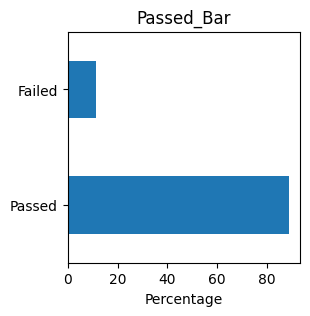

In [ ]:
#Target distribution
fig = ((eda_data.Passed_Bar.value_counts()/entities)*100).plot.barh(figsize=(3, 3))
fig.set_title("Passed_Bar")
fig.set_ylabel('')
fig.set_xlabel('Percentage')
fig.set_yticklabels(["Passed","Failed"])
#Get percentages
(data.Passed_Bar.value_counts()/entities)*100

Male
1.0    56.312909
0.0    43.687091
Name: count, dtype: float64

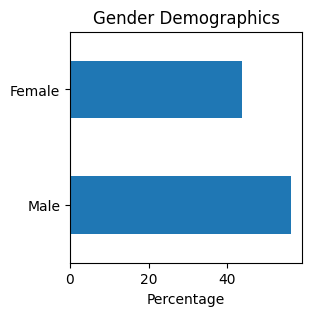

In [ ]:
#Number of males vs. females
fig = ((eda_data.Male.value_counts()/entities)*100).plot.barh(figsize=(3, 3))
fig.set_yticklabels(["Male","Female"])
fig.set_title("Gender Demographics")
fig.set_xlabel('Percentage')
fig.set_ylabel('')
(eda_data.Male.value_counts()/entities)*100

Race
white    83.905013
black     5.858497
hisp      4.534350
asian     3.874719
other     1.827421
Name: count, dtype: float64

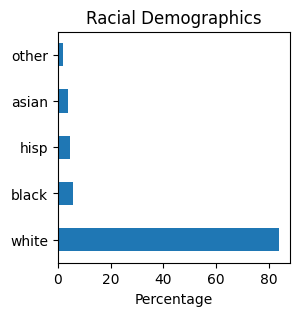

In [ ]:
#Race distribution
fig = ((eda_data.Race.value_counts()/entities)*100).plot.barh(figsize=(3, 3))
fig.set_title("Racial Demographics")
fig.set_ylabel('')
fig.set_xlabel('Percentage')
#Get percentages
(eda_data.Race.value_counts()/entities)*100

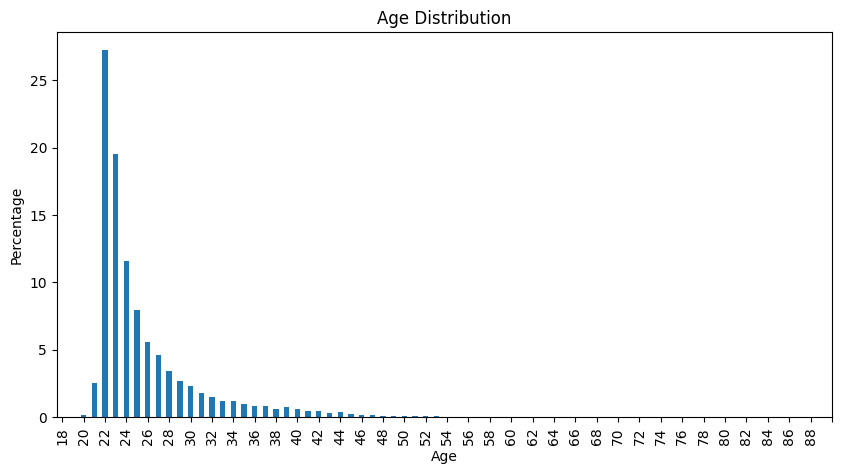

In [ ]:
#Age distribution
all_ages = {i:0 for i in range(18,90)}
ages = (eda_data.Age.value_counts()*100/entities).sort_index(axis=0).to_dict()
for key in ages.keys():
    all_ages[int(key)] = ages[key]
fig = pd.Series(all_ages).plot.bar(figsize=(10, 5))
fig.set_title("Age Distribution")
fig.set_xlabel("Age")
fig.set_ylabel("Percentage")
fig.set_xticks([x*2 for x in range (37)]);

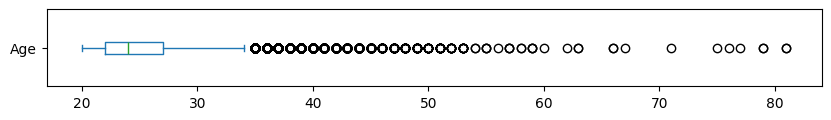

In [ ]:
#age, box and whisker for smaller/less empty plot
fig = eda_data.Age.plot.box(figsize=(10, 1),vert = False)

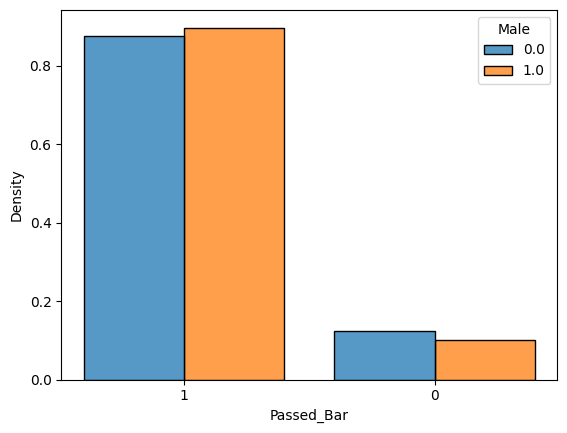

In [ ]:
#target by sex
fig = sns.histplot(x = eda_data.Passed_Bar.astype(str), hue=data.Male, multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False)

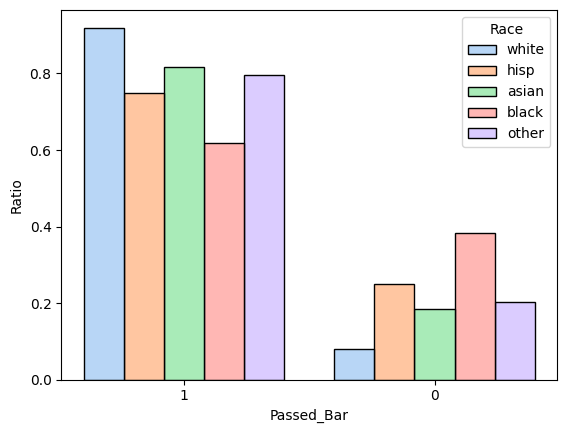

In [ ]:
#target by race
fig = sns.histplot(x = eda_data.Passed_Bar.astype(str), hue=data.Race, multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False,palette="pastel")
fig.set_ylabel('Ratio')
plt.savefig('pics/Race_Bar.png', dpi = 300, bbox_inches = 'tight')

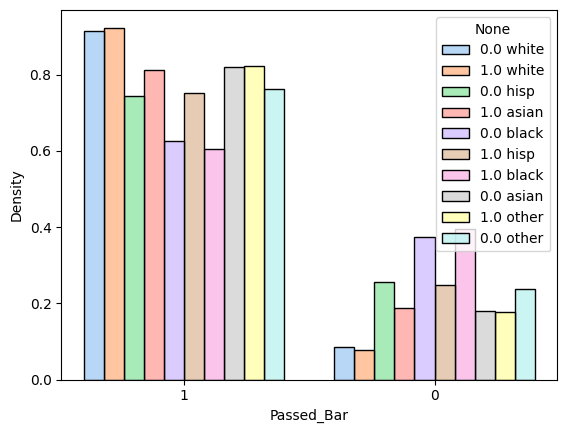

In [ ]:
#target by both (would re-assign colours/order values better if used)
race_sex = eda_data['Male'].astype(str) +" "+ eda_data['Race'] 
fig = sns.histplot(x = eda_data.Passed_Bar.astype(str), hue= race_sex ,multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False,palette="pastel")

## Demographics | Passed Bar vs Demographics| !PassedBar

In [ ]:
def plot_income_pass_fail(data_pass,data_fail):
    # Get value counts and sort by index
    fail_counts = 100*data_fail.Family_Income_Quantile.value_counts().sort_index()/len(data_fail)
    pass_counts = 100*data_pass.Family_Income_Quantile.value_counts().sort_index()/len(data_pass)

    # Create a new figure
    fig, ax = plt.subplots(figsize=(5, 1.75))

    # Plot data_fail
    fail_counts.plot(kind='bar', color='red', ax=ax, width=0.4, position=1)
    pass_counts.plot(kind='bar', color='blue', ax=ax, width=0.4, position=0)

    ax.set_title('Family Income Quantile for Passed and Failed Bar')
    ax.set_xlabel('Family Income Quantile')
    ax.set_ylabel('Percentage')
    ax.legend(["Failed Bar", "Passed_Bar"])

    # Show the plot
    plt.show()

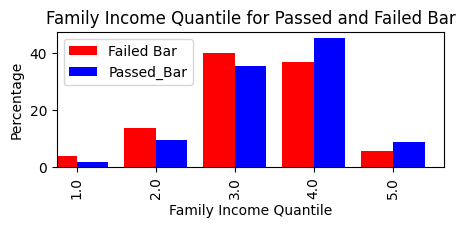

white
Mean Pass FIQ: 3.5497879344179273
Mean Fail FIQ: 3.488
Difference =  0.06178793441792729


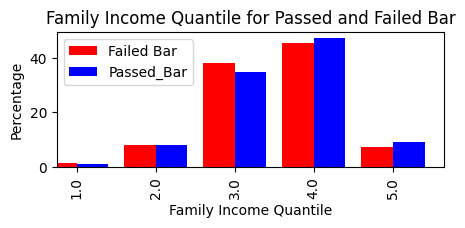

hisp
Mean Pass FIQ: 3.041726618705036
Mean Fail FIQ: 2.8969957081545066
Difference =  0.14473091055052922


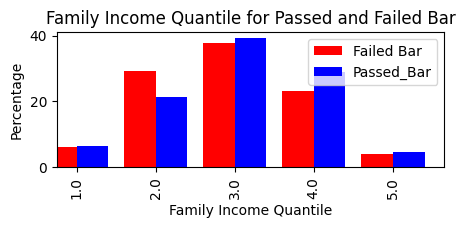

asian
Mean Pass FIQ: 3.384853168469861
Mean Fail FIQ: 3.2054794520547945
Difference =  0.1793737164150664


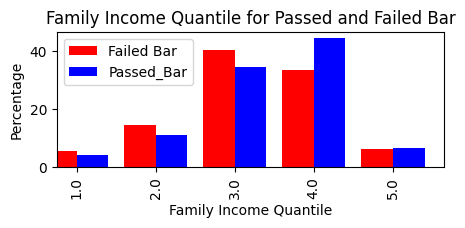

black
Mean Pass FIQ: 2.8933873144399462
Mean Fail FIQ: 2.8820960698689957
Difference =  0.011291244570950543


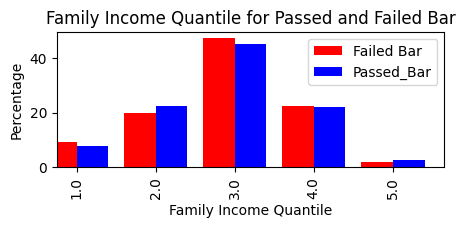

other
Mean Pass FIQ: 3.335570469798658
Mean Fail FIQ: 2.8815789473684212
Difference =  0.45399152243023666


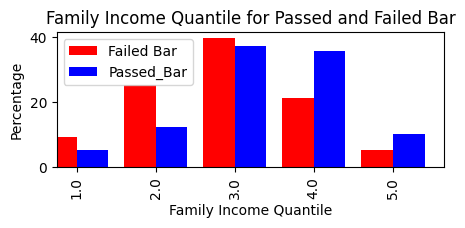

In [ ]:
#FIQ pass vs fail for each race
data_fail = eda_data[eda_data.Passed_Bar == False]
data_pass = eda_data[eda_data.Passed_Bar == True]
plot_income_pass_fail(data_pass,data_fail)
all_pass_means = []
all_fail_means = []
all_diff = []
for race in eda_data.Race.unique() :
    data_pass_race = data_pass[data_pass.Race == race]
    data_fail_race = data_fail[data_fail.Race == race]

    print(race)
    pass_mean = data_pass_race.Family_Income_Quantile.mean()
    fail_mean = data_fail_race.Family_Income_Quantile.mean()
    all_pass_means.append(pass_mean)
    all_fail_means.append(fail_mean)
    all_diff.append(pass_mean-fail_mean)

    print("Mean Pass FIQ:",pass_mean)
    print("Mean Fail FIQ:",fail_mean)
    print("Difference = ",pass_mean-fail_mean)
    plot_income_pass_fail(data_pass_race,data_fail_race)


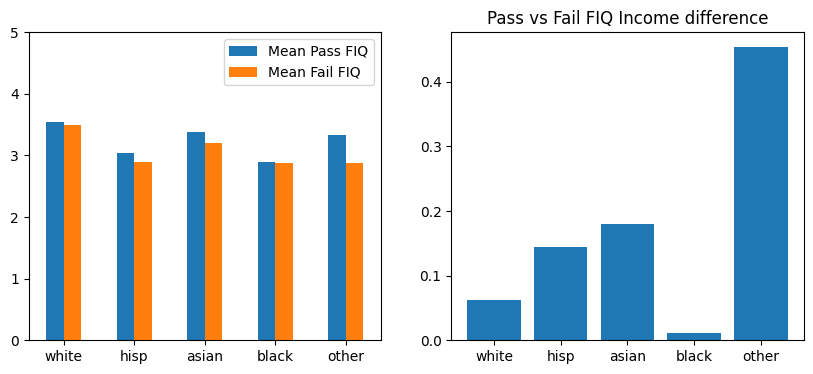

In [ ]:
#FIQ pass vs fail for each race summary
fig, ax = plt.subplots(1,2,figsize=(10, 4))
race_FIQ_df = pd.DataFrame([eda_data.Race.unique(),all_pass_means,all_fail_means]).transpose()
race_FIQ_df.plot.bar(ax=ax[0])
ax[0].legend(["Mean Pass FIQ","Mean Fail FIQ"])
ax[0].set_ylim((0,5))
ax[0].set_xticklabels(eda_data.Race.unique(),rotation = 0)
ax[1].bar(eda_data.Race.unique(),all_diff)
ax[1].set_title("Pass vs Fail FIQ Income difference")
#black pass rate least sensitive to family income collectively

plt.savefig('pics/FIQ_diff.png', dpi = 300, bbox_inches = 'tight')

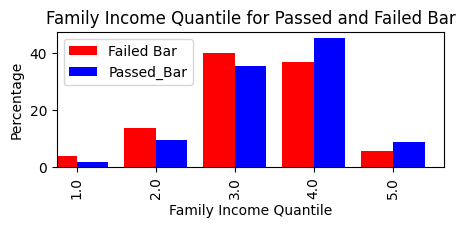

0.0
Mean Pass FIQ: 3.4518518518518517
Mean Fail FIQ: 3.2268226822682267
Difference =  0.22502916958362507


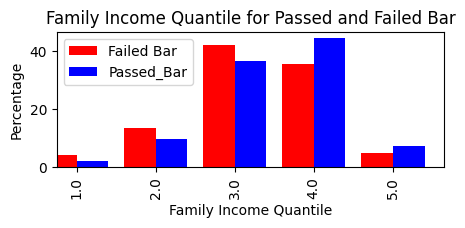

1.0
Mean Pass FIQ: 3.526285272516428
Mean Fail FIQ: 3.3075615972812233
Difference =  0.21872367523520486


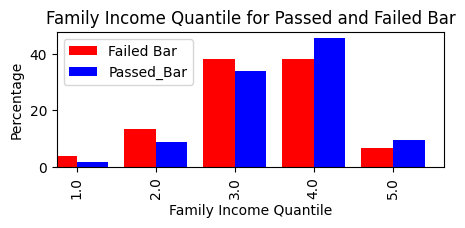

In [ ]:
#FIQ pass vs fail for each sex
data_fail = eda_data[eda_data.Passed_Bar == False]
data_pass = eda_data[eda_data.Passed_Bar == True]
plot_income_pass_fail(data_pass,data_fail)
all_pass_means_s = []
all_fail_means_s = []
all_diff_s = []
for race in eda_data.Male.unique() :
    data_pass_race = data_pass[data_pass.Male == race]
    data_fail_race = data_fail[data_fail.Male == race]

    print(race)
    pass_mean = data_pass_race.Family_Income_Quantile.mean()
    fail_mean = data_fail_race.Family_Income_Quantile.mean()
    all_pass_means_s.append(pass_mean)
    all_fail_means_s.append(fail_mean)
    all_diff_s.append(pass_mean-fail_mean)

    print("Mean Pass FIQ:",pass_mean)
    print("Mean Fail FIQ:",fail_mean)
    print("Difference = ",pass_mean-fail_mean)
    plot_income_pass_fail(data_pass_race,data_fail_race)



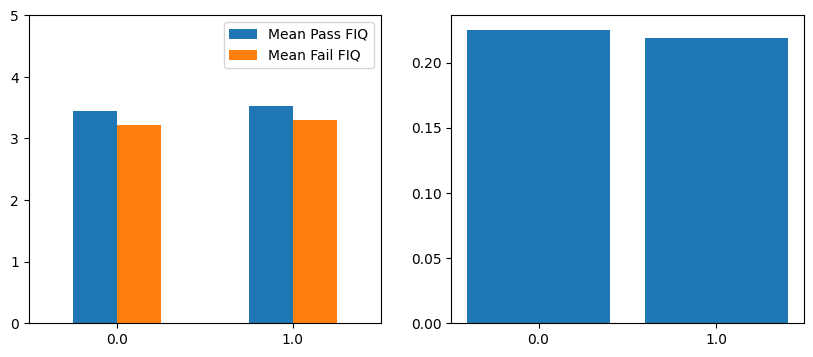

In [ ]:
#FIQ pass vs fail for each race summary
fig, ax = plt.subplots(1,2,figsize=(10, 4))
s_FIQ_df = pd.DataFrame([eda_data.Male.unique().astype(str),all_pass_means_s,all_fail_means_s]).transpose()
s_FIQ_df.plot.bar(ax=ax[0])
ax[0].legend(["Mean Pass FIQ","Mean Fail FIQ"])
ax[0].set_ylim((0,5))
ax[0].set_xticklabels(eda_data.Male.unique(),rotation = 0)
ax[1].bar(eda_data.Male.unique().astype(str),all_diff_s);
#black pass rate least sensitive to family income collectively


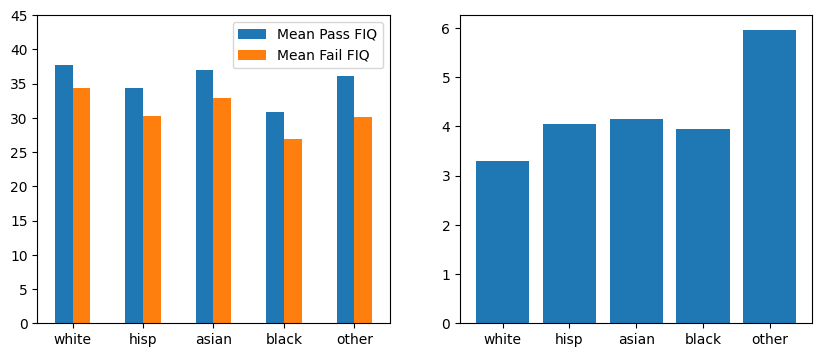

In [ ]:
#LSAT pass vs fail for each race
all_pass_means = []
all_fail_means = []
all_diff = []
for race in eda_data.Race.unique() :
    data_pass_race = data_pass[data_pass.Race == race]
    data_fail_race = data_fail[data_fail.Race == race]
    pass_mean = data_pass_race.LSAT.mean()
    fail_mean = data_fail_race.LSAT.mean()
    all_pass_means.append(pass_mean)
    all_fail_means.append(fail_mean)
    all_diff.append(pass_mean-fail_mean)
fig, ax = plt.subplots(1,2,figsize=(10, 4))
s_FIQ_df = pd.DataFrame([eda_data.Race.unique().astype(str),all_pass_means,all_fail_means]).transpose()
s_FIQ_df.plot.bar(ax=ax[0])
ax[0].legend(["Mean Pass FIQ","Mean Fail FIQ"])
ax[0].set_ylim((0,45))
ax[0].set_xticklabels(eda_data.Race.unique(),rotation = 0)
ax[1].bar(eda_data.Race.unique(),all_diff);
#black pass rate least sensitive to family income collectively


In [ ]:
#Make race one hot
eda_data[['asian', 'black', 'hisp', 'other', "white"]] = pd.get_dummies(eda_data.Race)
data_pass[['asian', 'black', 'hisp', 'other', "white"]] = pd.get_dummies(data_pass.Race)
data_fail[['asian', 'black', 'hisp', 'other', "white"]] = pd.get_dummies(data_fail.Race)
# sns.heatmap(eda_data.drop(columns = ["Race"]).corr()); # better, ordered heatmaps below 

/tmp/ipykernel_577/2937741968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pass[['asian', 'black', 'hisp', 'other', "white"]] = pd.get_dummies(data_pass.Race)
/tmp/ipykernel_577/2937741968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pass[['asian', 'black', 'hisp', 'other', "white"]] = pd.get_dummies(data_pass.Race)
/tmp/ipykernel_577/2937741968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

Computing correlation


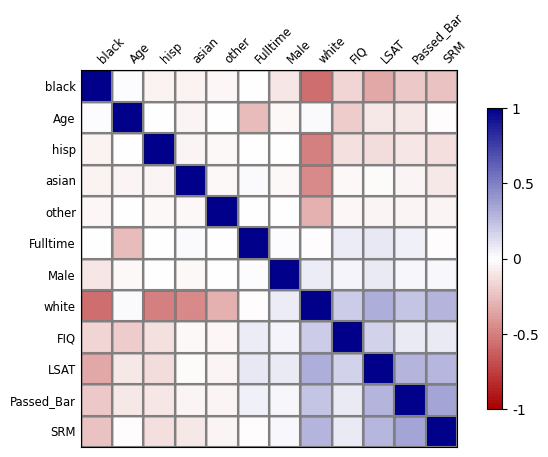

In [ ]:
#general correlation plot
c = corrplot.Corrplot(eda_data.drop(columns = ["Race"]).rename({'Family_Income_Quantile': 'FIQ',
                                                                'Schl_Ranking_Mean': 'SRM'}, axis = 1))
c.plot(method='color' ,rotation=45)
#https://nbviewer.org/github/biokit/biokit/blob/master/notebooks/viz/corrplot.ipynb
plt.savefig('pics/cor_plot.png', dpi = 300, bbox_inches = 'tight');

Computing correlation


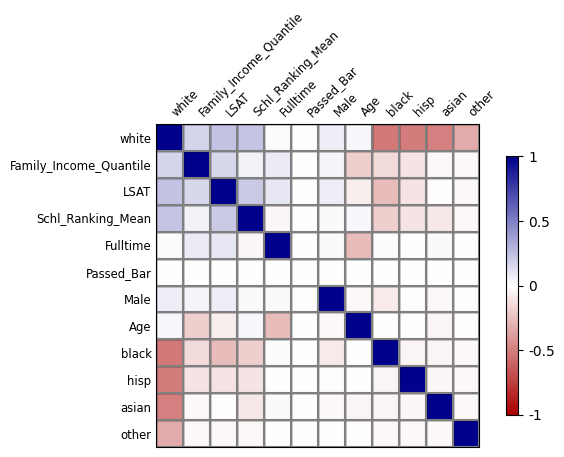

In [ ]:
#correlation for those that passed
c = corrplot.Corrplot(data_pass.drop(columns = ["Race"]))
c.plot(method="color" ,rotation=45);

Computing correlation


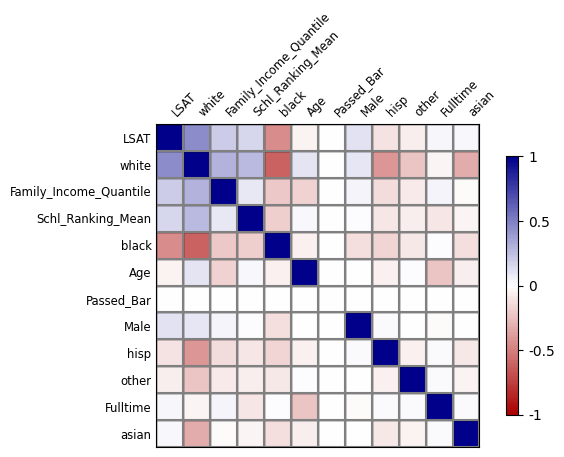

In [ ]:
#correlation for those that failed
c = corrplot.Corrplot(data_fail.drop(columns = ["Race"]))
c.plot(method='color' ,rotation=45);

<Axes: >

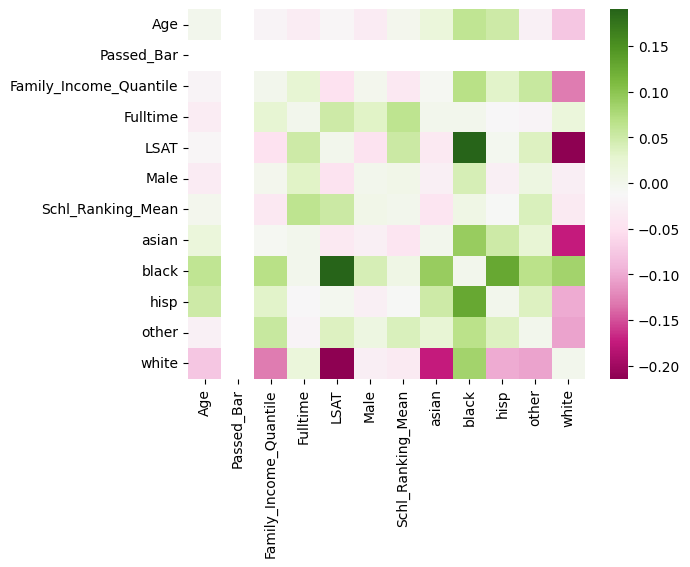

In [ ]:
sns.heatmap(data_pass.drop(columns = ["Race"]).corr()-data_fail.drop(columns = ["Race"]).corr(),cmap="PiYG")
#difference in correlations pass vs fail
#e.g LSAT scores correlate with whiteness more when the bar is failed
#LSAT scores correlate with blackness less when the bar is failed

# Models

## Defining Functions

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.linalg import orth
from sklearn.utils import shuffle



x_train_col = ['Age', 'Family_Income_Quantile', 'Fulltime', 'Graduated', 'LSAT', 'Schl_Ranking_Mean']
y_train_col = ['Passed_Bar']
protected_features = ['asian', 'black', 'hisp', 'other', 'white', 'Male']
data = data.replace({True:1, False:0})

def statParity(y_hat, group_test, group):
    selected = y_hat[group_test == group].sum()
    sampleSize = len(group_test[group_test == group])
    return selected/sampleSize

def getAccuracies(y = None, y_hat = None, group_test = None, lam = None):
    acc = np.array([
        lam,
        round(accuracy_score(y, y_hat)*100,2),
        round(accuracy_score(y[group_test['asian'].astype(bool)], y_hat[group_test['asian'].astype(bool)])*100,2),
        round(accuracy_score(y[group_test['black'].astype(bool)], y_hat[group_test['black'].astype(bool)])*100,2),
        round(accuracy_score(y[group_test['hisp'].astype(bool)], y_hat[group_test['hisp'].astype(bool)])*100,2),
        round(accuracy_score(y[group_test['other'].astype(bool)], y_hat[group_test['other'].astype(bool)])*100,2),
        round(accuracy_score(y[group_test['white'].astype(bool)], y_hat[group_test['white'].astype(bool)])*100,2),
        round(accuracy_score(y[group_test['Male'].astype(bool)], y_hat[group_test['Male'].astype(bool)])*100,2),
        round(accuracy_score(y[~group_test['Male'].astype(bool)], y_hat[~group_test['Male'].astype(bool)])*100,2),
        ]) 
    return acc

def getStatParities(y_hat = None, group_test = None, lam = None):
    stat = np.array([
        lam,
        round(statParity(y_hat, group_test['asian'], 1)*100,2),
        round(statParity(y_hat, group_test['black'], 1)*100,2),
        round(statParity(y_hat, group_test['hisp'], 1)*100,2),
        round(statParity(y_hat, group_test['other'], 1)*100,2),
        round(statParity(y_hat, group_test['white'], 1)*100,2),
        round(statParity(y_hat, group_test['Male'], 1)*100,2),
        round(statParity(y_hat, group_test['Male'], 0)*100,2)
        ])
    return stat

def lambdaRegularize(data_projected, original, lam):
    """
    Used to regularize the projected data with the lambda parameter
    """
    temp = data_projected.copy()
    for col in temp.columns:
        temp[col] = temp[col] + (lam * (original[col]- temp[col]))
    return temp

def reprojectData(r_j, df):
    dot = r_j.T @ df.to_numpy()
    projected = df.to_numpy() - (r_j @ dot)
    return projected


def getReprojection(X_train, group_train, X_test, lam):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train = pd.DataFrame(X_train, columns=x_train_col)
    r = orth(group_train.to_numpy())
    X_train_pro = reprojectData(r, X_train)
    X_train_pro = pd.DataFrame(X_train_pro, columns=x_train_col)
    X_train_pro = lambdaRegularize(X_train_pro, X_train, lam = lam)
    return X_train_pro, X_test



def crossValidation(folds, dataList, lam, model, reprojection = False):
    overallScores = np.array([0,0,0,0,0,0,0,0,0], dtype='float64')
    overallStats = np.array([0,0,0,0,0,0,0,0], dtype='float64')
    for i in range(folds):
        #Get train
        X_train = pd.concat(dataList[:i] + dataList[i+1:])[x_train_col]
        y_train = pd.concat(dataList[:i] + dataList[i+1:])[y_train_col].to_numpy().reshape(-1)
        group_train = pd.concat(dataList[:i] + dataList[i+1:])[protected_features]
        #Get test
        X_test = dataList[i][x_train_col]
        y_test = dataList[i][y_train_col]
        group_test = dataList[i][protected_features]
        if reprojection:
            X_train, X_test = getReprojection(X_train, group_train, X_test, lam = lam)
        #Train model
        model.fit(X_train.values,y_train)
        y_pred_test = model.predict(X_test)
        
        overallScores += getAccuracies(y = y_test, y_hat = y_pred_test, group_test = group_test, lam = lam)
        overallStats += getStatParities(y_hat = y_pred_test, group_test = group_test, lam = lam)

    #print("Accuracies:{}, Statistial parity:{}".format(overallScores/folds, overallStats/folds))
    return (overallScores/folds, overallStats/folds)



In [ ]:
#Make data chucks for cross validation
data = shuffle(data, random_state=42)
data = data.reset_index(drop = True)
size = int(len(data)/5)
dataChuncks = [data.iloc[size*i:(size*i+size)] for i in range(5)]

## Making baseline models

In [ ]:
logModel = LogisticRegression(class_weight = "balanced", random_state=42, max_iter=1000)
overLog, statsLog = crossValidation(folds = folds, dataList = dataChuncks, lam = -1, model = logModel, reprojection = False)


KeyError: "['Graduated'] not in index"

In [ ]:
randomModel = RandomForestClassifier(n_estimators=150,
                                    max_depth=None, 
                                    min_samples_split=10,
                                    random_state=42)
overRandom, statsRandom = crossValidation(folds = folds, dataList = dataChuncks, lam = -1, model = randomModel, reprojection = False)


## Training models

In [ ]:
#Train logistic regression
scores = []
stats = []

for i in range(101):
    l = i/100
    overallScores, overallStats = crossValidation(folds = 5, 
                                                  dataList = dataChuncks,
                                                  model= LogisticRegression(class_weight = "balanced", 
                                                                            random_state=42, 
                                                                            max_iter=1000), 
                                                  lam = l, 
                                                  reprojection = True)
    scores.append(overallScores)
    stats.append(overallStats)

scoresLogistic = pd.DataFrame(scores, columns= ['Lambda', 'Overall', 'Asian', 'Black', 'Hisp', 'Other', 'White', 'Male', 'Female'])
statsLogistic = pd.DataFrame(stats, columns= ['Lambda', 'Asian', 'Black', 'Hisp', 'Other', 'White', 'Male', 'Female'])

In [ ]:
#Train random forest
scores = []
stats = []

for i in range(101):
    l = i/100
    overallScores, overallStats = crossValidation(folds = 5, 
                                                  dataList = dataChuncks,
                                                  model= RandomForestClassifier(n_estimators=150,
                                                                                max_depth=None, 
                                                                                min_samples_split=10,
                                                                                random_state=42), 
                                                  lam = l, 
                                                  reprojection = True)
    scores.append(overallScores)
    stats.append(overallStats)

scoresRandom = pd.DataFrame(scores, columns= ['Lambda', 'Overall', 'Asian', 'Black', 'Hisp', 'Other', 'White', 'Male', 'Female'])
statsRandom = pd.DataFrame(stats, columns= ['Lambda', 'Asian', 'Black', 'Hisp', 'Other', 'White', 'Male', 'Female'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=24a695ab-6067-4c97-926f-bab7924aba59' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>